In [108]:
import pandas as pd
from sklearn.impute import KNNImputer
file_path = '/Users/tanushaerpula/Desktop/Airlines Reviews and Rating.csv'

df = pd.read_csv(file_path)

print(df)

     Aircraft Type                                      Users Reviews  \
0              NaN  ✅Trip Verified|  Cancelled our flight last-min...   
1              NaN  ✅Trip Verified| I had a flight from Miami, Flo...   
2              NaN  ✅Trip Verified|  We started our day with BA in...   
3              NaN  ✅Trip Verified|  I fly British Airways weekly ...   
4              NaN  Not Verified|  Everything was ok until our con...   
...            ...                                                ...   
3285           NaN  LAX to LHR - 25 Oct 2014. I agree with other r...   
3286           NaN  Toronto to London Heathrow - 26/10/14. After r...   
3287           NaN  I have after years of loyalty finally had it w...   
3288           NaN  Traveled with British Airways ORD-LHR last mon...   
3289           NaN  Travelled to Palma in new BA 'sardine' busines...   

             Country Type_of_Travellers                                Route  \
0     United Kingdom     Couple Leisure    

In [109]:
df.head()

,Aircraft Type,Users Reviews,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
0,NaN,✅Trip Verified| Cancelled our flight last-min...,United Kingdom,Couple Leisure,London Heathrow to Tokyo,Economy Class,1.0,Sep-23,1.0,2.0,1.0,NaN,3.0,1,no
1,NaN,"✅Trip Verified| I had a flight from Miami, Flo...",United States,Solo Leisure,Miami to Dublin via London Heathrow,Business Class,1.0,Aug-23,3.0,1.0,2.0,1.0,1.0,1,no
2,NaN,✅Trip Verified| We started our day with BA in...,United States,Business,Prague to San Francisco via London,Business Class,1.0,Sep-23,3.0,1.0,3.0,1.0,NaN,1,no
3,NaN,✅Trip Verified| I fly British Airways weekly ...,United Kingdom,Business,London to Glasgow,Economy Class,1.0,Sep-23,1.0,1.0,1.0,1.0,1.0,1,no
4,NaN,Not Verified| Everything was ok until our con...,France,Family Leisure,San Diego to Marseille via London,Economy Class,3.0,Aug-23,2.0,1.0,3.0,1.0,3.0,3,no


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft Type           1896 non-null   object 
 1   Users Reviews           3290 non-null   object 
 2   Country                 3289 non-null   object 
 3   Type_of_Travellers      2887 non-null   object 
 4   Route                   2883 non-null   object 
 5   Seat_Types              3287 non-null   object 
 6   Seat Comfort            3176 non-null   float64
 7   Date Flown              2880 non-null   object 
 8   Cabin Staff Service     3165 non-null   float64
 9   Ground Service          2812 non-null   float64
 10  Food & Beverages        2911 non-null   float64
 11  Wifi & Connectivity     592 non-null    float64
 12  Inflight Entertainment  2171 non-null   float64
 13  Value For Money         3290 non-null   int64  
 14  Recommended             3290 non-null   

In [111]:
null_counts = df.isnull().sum()
print(null_counts)

Aircraft Type             1394
Users Reviews                0
Country                      1
Type_of_Travellers         403
Route                      407
Seat_Types                   3
Seat Comfort               114
Date Flown                 410
Cabin Staff Service        125
Ground Service             478
Food & Beverages           379
Wifi & Connectivity       2698
Inflight Entertainment    1119
Value For Money              0
Recommended                  0
dtype: int64


In [112]:
df = df.drop("Users Reviews", axis='columns')

print(df)

     Aircraft Type         Country Type_of_Travellers  \
0              NaN  United Kingdom     Couple Leisure   
1              NaN   United States       Solo Leisure   
2              NaN   United States           Business   
3              NaN  United Kingdom           Business   
4              NaN          France     Family Leisure   
...            ...             ...                ...   
3285           NaN  United Kingdom                NaN   
3286           NaN  United Kingdom                NaN   
3287           NaN  United Kingdom                NaN   
3288           NaN   United States                NaN   
3289           NaN  United Kingdom                NaN   

                                    Route      Seat_Types  Seat Comfort  \
0                London Heathrow to Tokyo   Economy Class           1.0   
1     Miami to Dublin via London Heathrow  Business Class           1.0   
2      Prague to San Francisco via London  Business Class           1.0   
3              

In [113]:
#choosing the optimal k value

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Separate numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Function to evaluate k-NN imputer
def evaluate_knn_imputer(k, train_data, test_data, numerical_cols):
    imputer = KNNImputer(n_neighbors=k)
    train_imputed = imputer.fit_transform(train_data[numerical_cols])
    test_imputed = imputer.transform(test_data[numerical_cols])
    
    # Create a mask for non-NaN values in the test set
    test_non_nan_mask = ~np.isnan(test_data[numerical_cols].values)
    
    # Flatten the mask to 1D array
    flat_mask = test_non_nan_mask.flatten()
    
    # Compute MSE only on the originally available data
    test_original = test_data[numerical_cols].values.flatten()[flat_mask]
    test_imputed_flat = test_imputed.flatten()[flat_mask]
    
    test_mse = mean_squared_error(test_original, test_imputed_flat)
    
    return test_mse

# Grid search for optimal k
k_values = [3, 5, 7, 9, 11]
results = {}

for k in k_values:
    test_mse = evaluate_knn_imputer(k, train_df, test_df, numerical_cols)
    results[k] = test_mse


print("k\tTest MSE")
for k in k_values:
    print(f"{k}\t{results[k]:.4f}")

# Choose the best k
best_k = min(results, key=results.get)
print(f"Optimal number of neighbors: {best_k}")


k	Test MSE
3	0.0000
5	0.0000
7	0.0000
9	0.0000
11	0.0000
Optimal number of neighbors: 3


In [114]:
#Imputing numerical columns using k value
import pandas as pd
from sklearn.impute import KNNImputer


# Display the null counts before imputation for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Null counts before imputation (numerical):\n", df[numerical_cols].isnull().sum())

# Handle NaN values in numerical columns using KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

#the null counts after imputation for numerical columns
print("Null counts after imputation (numerical):\n", df[numerical_cols].isnull().sum())

Null counts before imputation (numerical):
 Seat Comfort               114
Cabin Staff Service        125
Ground Service             478
Food & Beverages           379
Wifi & Connectivity       2698
Inflight Entertainment    1119
Value For Money              0
dtype: int64
Null counts after imputation (numerical):
 Seat Comfort              0
Cabin Staff Service       0
Ground Service            0
Food & Beverages          0
Wifi & Connectivity       0
Inflight Entertainment    0
Value For Money           0
dtype: int64


In [115]:
#Imputing categorical values
# Display the null counts before imputation for categorical columns
categorical_cols = ['Country', 'Type_of_Travellers', 'Route', 'Seat_Types']
print("Null counts before imputation (categorical):\n",df[categorical_cols].isnull().sum())

# Function to impute missing categorical values using mode
def majority_vote_imputer(data):
    imputed_data = data.copy()
    for col in data.columns:
        imputed_data[col].fillna(imputed_data[col].mode()[0], inplace=True)
    return imputed_data

# Impute missing categorical values using majority voting (mode)
df[categorical_cols] = majority_vote_imputer(df[categorical_cols])

# Display the null counts after imputation for categorical columns
print("Null counts after imputation (categorical):\n", df[categorical_cols].isnull().sum())



Null counts before imputation (categorical):
 Country                 1
Type_of_Travellers    403
Route                 407
Seat_Types              3
dtype: int64
Null counts after imputation (categorical):
 Country               0
Type_of_Travellers    0
Route                 0
Seat_Types            0
dtype: int64


In [104]:
# Combine numerical and categorical data back into a single DataFrame
imputed_df = pd.concat([df[numerical_cols], df[categorical_cols]], axis=1)


#combined DataFrame with imputed values
print("Imputed DataFrame:\n", imputed_df.head())


Imputed DataFrame:
    Seat Comfort  Cabin Staff Service  Ground Service  Food & Beverages  \
0           1.0                  1.0             2.0               1.0   
1           1.0                  3.0             1.0               2.0   
2           1.0                  3.0             1.0               3.0   
3           1.0                  1.0             1.0               1.0   
4           3.0                  2.0             1.0               3.0   

   Wifi & Connectivity  Inflight Entertainment  Value For Money  \
0             1.666667                3.000000              1.0   
1             1.000000                1.000000              1.0   
2             1.000000                1.666667              1.0   
3             1.000000                1.000000              1.0   
4             1.000000                3.000000              3.0   

          Country Type_of_Travellers                                Route  \
0  United Kingdom     Couple Leisure             London

In [116]:
df.isnull().sum()

Aircraft Type             1394
Country                      0
Type_of_Travellers           0
Route                        0
Seat_Types                   0
Seat Comfort                 0
Date Flown                 410
Cabin Staff Service          0
Ground Service               0
Food & Beverages             0
Wifi & Connectivity          0
Inflight Entertainment       0
Value For Money              0
Recommended                  0
dtype: int64

In [117]:
# Count missing values in 'Aircraft Type'
missing_count = df['Aircraft Type'].isnull().sum()
print(f"Number of missing values in 'Aircraft Type': {missing_count}")

# Impute missing values with the most frequent value (mode)
most_frequent_aircraft_type = df['Aircraft Type'].mode()[0]
df['Aircraft Type'].fillna(most_frequent_aircraft_type, inplace=True)

# Verify that missing values have been imputed
missing_count_after = df['Aircraft Type'].isnull().sum()
print(f"After imputation, number of missing values in 'Aircraft Type': {missing_count_after}")


Number of missing values in 'Aircraft Type': 1394
After imputation, number of missing values in 'Aircraft Type': 0


In [118]:
# Count missing values in 'Date Flown'
missing_count = df['Date Flown'].isnull().sum()
print(f"Number of missing values in 'Date Flown': {missing_count}")

# Impute missing values with the most frequent date (mode)
most_frequent_date = df['Date Flown'].mode()[0]
df['Date Flown'].fillna(most_frequent_date, inplace=True)

# Verify that missing values have been imputed
missing_count_after = df['Date Flown'].isnull().sum()
print(f"After imputation, number of missing values in 'Date Flown': {missing_count_after}")


Number of missing values in 'Date Flown': 410
After imputation, number of missing values in 'Date Flown': 0


In [120]:
df.isnull().sum()

Aircraft Type             0
Country                   0
Type_of_Travellers        0
Route                     0
Seat_Types                0
Seat Comfort              0
Date Flown                0
Cabin Staff Service       0
Ground Service            0
Food & Beverages          0
Wifi & Connectivity       0
Inflight Entertainment    0
Value For Money           0
Recommended               0
dtype: int64

In [132]:
df.to_csv('/Users/tanushaerpula/Desktop/Airlines Reviews and Rating.csv', index=False)

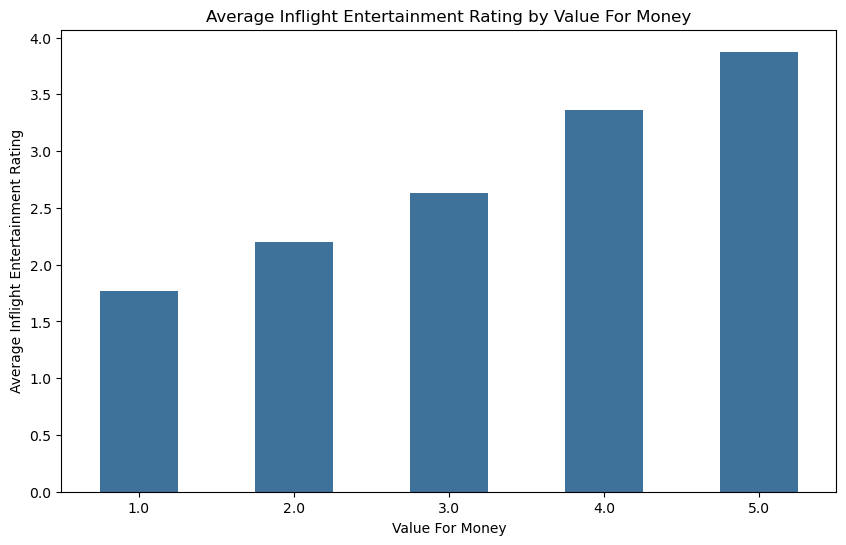

In [134]:
import matplotlib.pyplot as plt
grouped_data = df.groupby('Value For Money')['Inflight Entertainment'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='#3F729B')

# Adding title and labels
plt.title('Average Inflight Entertainment Rating by Value For Money')
plt.xlabel('Value For Money')
plt.ylabel('Average Inflight Entertainment Rating')
plt.xticks(rotation=0)

# Show the plot
plt.show()


In [138]:
print(df.dtypes)

Aircraft Type              object
Country                    object
Type_of_Travellers         object
Route                      object
Seat_Types                 object
Seat Comfort              float64
Date Flown                 object
Cabin Staff Service       float64
Ground Service            float64
Food & Beverages          float64
Wifi & Connectivity       float64
Inflight Entertainment    float64
Value For Money           float64
Recommended                object
dtype: object
